In [1]:
%run bernoulli.py

In [2]:
import time

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Plot 1
    1000 comments
    4 categories
    alpha: [3*a, a]

In [3]:
comments = 1000
categories = 4
alpha = 0.6
list_alphas = [3*alpha, alpha]
df = np.random.dirichlet(list_alphas, (categories, comments))

In [4]:
c1, c2, c3, c4 = separate_agreed_votes_per_category(distribution=df, categories=categories)

In [5]:
votes1 = np.random.random(size=(1000, comments)) < c1
votes2 = np.random.random(size=(700, comments)) < c2
votes3 = np.random.random(size=(1200, comments)) < c3
votes4 = np.random.random(size=(900, comments)) < c4

In [6]:
votes = np.vstack([votes1,votes2,votes3,votes4])

In [7]:
df = create_column_category([votes1, votes2, votes3, votes4])

In [8]:
df.index[99:104]

RangeIndex(start=99, stop=104, step=1)

In [9]:
df.category.value_counts()

3    1200
1    1000
4     900
2     700
Name: category, dtype: int64

In [10]:
df.shape

(3800, 1001)

In [11]:
accs = []

In [12]:
ncols = df.iloc[:, :-1].shape[1]

In [13]:
for i in range(1, ncols):
    #print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:i], df['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    #print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})

In [14]:
df_accs = pd.DataFrame.from_dict(accs)

(0, 100)

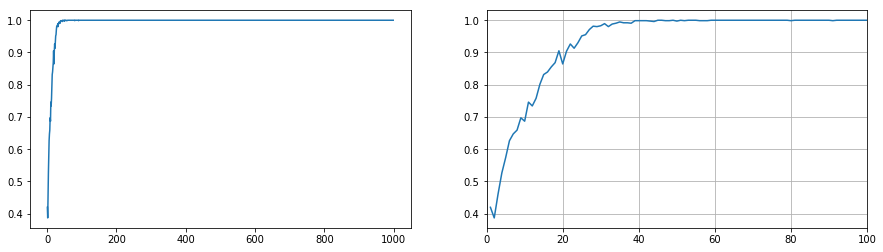

In [15]:
curve_dir = plt.figure(figsize=(15,4))
total = curve_dir.add_subplot(121)
partial = curve_dir.add_subplot(122)
total.plot(df_accs.qtd, df_accs.acc)
partial.plot(df_accs.qtd, df_accs.acc)
partial.grid()
plt.xlim(0,100)

In [16]:
print("acc: ", accuracy_score(y_exp, y_pred))
print(metrics.classification_report(y_exp, y_pred))
print(metrics.confusion_matrix(y_exp, y_pred))

acc:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       215
           2       1.00      1.00      1.00       124
           3       1.00      1.00      1.00       244
           4       1.00      1.00      1.00       177

   micro avg       1.00      1.00      1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

[[215   0   0   0]
 [  0 124   0   0]
 [  0   0 244   0]
 [  0   0   0 177]]


### Plot 2
    1000 comments
    4 categories
    alpha: [a, a]

In [17]:
comments = 1000
categories = 4
alpha = 0.6
list_alphas = [alpha, alpha]
df = np.random.dirichlet(list_alphas, (categories, comments))

In [18]:
c1, c2, c3, c4 = separate_agreed_votes_per_category(distribution=df, categories=categories)

In [19]:
votes1 = np.random.random(size=(1000, comments)) < c1
votes2 = np.random.random(size=(700, comments)) < c2
votes3 = np.random.random(size=(1200, comments)) < c3
votes4 = np.random.random(size=(900, comments)) < c4

votes = np.vstack([votes1,votes2,votes3,votes4])
df = create_column_category([votes1, votes2, votes3, votes4])

In [20]:
df.shape

(3800, 1001)

In [21]:
accs = []
ncols = df.iloc[:, :-1].shape[1]

In [23]:
start_time = time.time()

for i in range(1, ncols):
    #print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:i], df['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    #print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})
elapsed_time = time.time() - start_time
print('time: ', elapsed_time)

time:  56.25533843040466


In [24]:
df_accs = pd.DataFrame.from_dict(accs)

(0, 100)

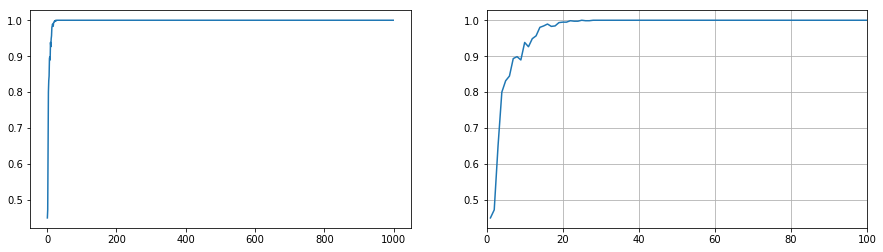

In [25]:
curve_dir = plt.figure(figsize=(15,4))
total = curve_dir.add_subplot(121)
partial = curve_dir.add_subplot(122)
total.plot(df_accs.qtd, df_accs.acc)
partial.plot(df_accs.qtd, df_accs.acc)
partial.grid()
plt.xlim(0,100)

In [26]:
print("acc: ", accuracy_score(y_exp, y_pred))
print(metrics.classification_report(y_exp, y_pred))
print(metrics.confusion_matrix(y_exp, y_pred))

acc:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       197
           2       1.00      1.00      1.00       153
           3       1.00      1.00      1.00       238
           4       1.00      1.00      1.00       172

   micro avg       1.00      1.00      1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

[[197   0   0   0]
 [  0 153   0   0]
 [  0   0 238   0]
 [  0   0   0 172]]


### Plot 3
    1000 comments
    4 categories
    alpha: [15*a, a]

In [27]:
comments = 1000
categories = 4
alpha = 0.6
list_alphas = [15 * alpha, alpha]
df = np.random.dirichlet(list_alphas, (categories, comments))

In [28]:
c1, c2, c3, c4 = separate_agreed_votes_per_category(distribution=df, categories=categories)

In [29]:
votes1 = np.random.random(size=(1000, comments)) < c1
votes2 = np.random.random(size=(700, comments)) < c2
votes3 = np.random.random(size=(1200, comments)) < c3
votes4 = np.random.random(size=(900, comments)) < c4

votes = np.vstack([votes1,votes2,votes3,votes4])
df = create_column_category([votes1, votes2, votes3, votes4])

In [30]:
df.shape

(3800, 1001)

In [31]:
accs = []
ncols = df.iloc[:, :-1].shape[1]

In [32]:
start_time = time.time()

for i in range(1, ncols):
    #print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:i], df['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    #print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})
elapsed_time = time.time() - start_time
print('time: ', elapsed_time)

time:  35.45022511482239


In [33]:
df_accs = pd.DataFrame.from_dict(accs)

(0, 100)

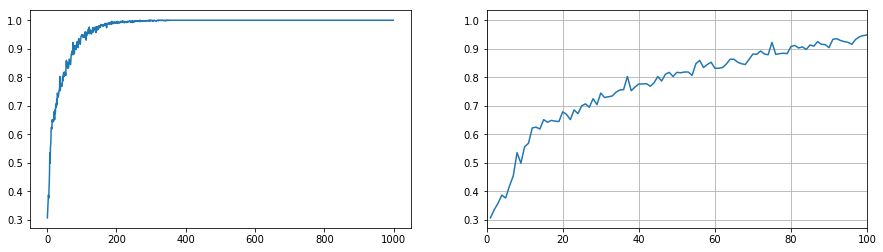

In [34]:
curve_dir = plt.figure(figsize=(15,4))
total = curve_dir.add_subplot(121)
partial = curve_dir.add_subplot(122)
total.plot(df_accs.qtd, df_accs.acc)
partial.plot(df_accs.qtd, df_accs.acc)
partial.grid()
plt.xlim(0,100)

(0, 200)

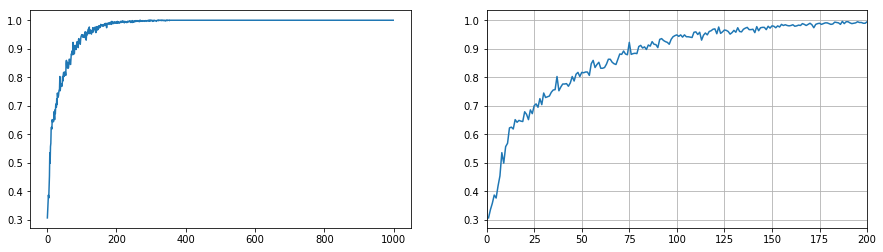

In [35]:
curve_dir = plt.figure(figsize=(15,4))
total = curve_dir.add_subplot(121)
partial = curve_dir.add_subplot(122)
total.plot(df_accs.qtd, df_accs.acc)
partial.plot(df_accs.qtd, df_accs.acc)
partial.grid()
plt.xlim(0,200)

In [36]:
print("acc: ", accuracy_score(y_exp, y_pred))
print(metrics.classification_report(y_exp, y_pred))
print(metrics.confusion_matrix(y_exp, y_pred))

acc:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       264
           4       1.00      1.00      1.00       157

   micro avg       1.00      1.00      1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

[[190   0   0   0]
 [  0 149   0   0]
 [  0   0 264   0]
 [  0   0   0 157]]


### Plot 4
    1000 comments
    4 categories
    alpha: [50*a, a]

In [38]:
comments = 1000
categories = 4
alpha = 0.6
list_alphas = [50 * alpha, alpha]
df = np.random.dirichlet(list_alphas, (categories, comments))

In [39]:
c1, c2, c3, c4 = separate_agreed_votes_per_category(distribution=df, categories=categories)

In [40]:
votes1 = np.random.random(size=(1000, comments)) < c1
votes2 = np.random.random(size=(700, comments)) < c2
votes3 = np.random.random(size=(1200, comments)) < c3
votes4 = np.random.random(size=(900, comments)) < c4

votes = np.vstack([votes1,votes2,votes3,votes4])
df = create_column_category([votes1, votes2, votes3, votes4])

In [41]:
df.shape

(3800, 1001)

In [42]:
accs = []
ncols = df.iloc[:, :-1].shape[1]

In [43]:
start_time = time.time()

for i in range(1, ncols):
    #print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:i], df['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    #print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})
elapsed_time = time.time() - start_time
print('time: ', elapsed_time)

time:  33.14454483985901


In [44]:
df_accs = pd.DataFrame.from_dict(accs)

(0, 100)

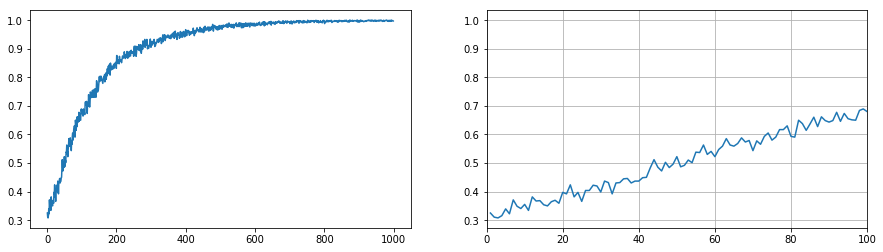

In [45]:
curve_dir = plt.figure(figsize=(15,4))
total = curve_dir.add_subplot(121)
partial = curve_dir.add_subplot(122)
total.plot(df_accs.qtd, df_accs.acc)
partial.plot(df_accs.qtd, df_accs.acc)
partial.grid()
plt.xlim(0,100)

(0, 200)

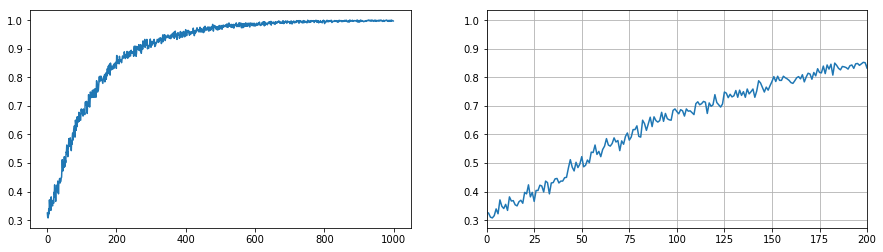

In [46]:
curve_dir = plt.figure(figsize=(15,4))
total = curve_dir.add_subplot(121)
partial = curve_dir.add_subplot(122)
total.plot(df_accs.qtd, df_accs.acc)
partial.plot(df_accs.qtd, df_accs.acc)
partial.grid()
plt.xlim(0,200)

(0, 500)

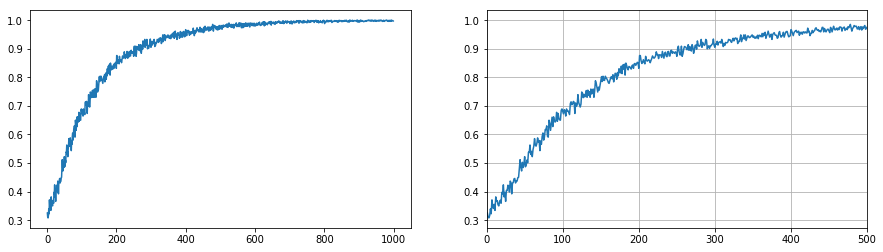

In [47]:
curve_dir = plt.figure(figsize=(15,4))
total = curve_dir.add_subplot(121)
partial = curve_dir.add_subplot(122)
total.plot(df_accs.qtd, df_accs.acc)
partial.plot(df_accs.qtd, df_accs.acc)
partial.grid()
plt.xlim(0,500)

In [48]:
print("acc: ", accuracy_score(y_exp, y_pred))
print(metrics.classification_report(y_exp, y_pred))
print(metrics.confusion_matrix(y_exp, y_pred))

acc:  0.9973684210526316
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00       140
           3       1.00      1.00      1.00       229
           4       1.00      0.99      0.99       182

   micro avg       1.00      1.00      1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

[[209   0   0   0]
 [  0 140   0   0]
 [  0   0 229   0]
 [  1   0   1 180]]


In [37]:
print('teste')

teste


__________________________________________